In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pip install q keras==2.3.1

In [4]:
!pip install tensorflow==1.14

In [5]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [6]:
import keras
print(keras.__version__)

2.3.1


Using TensorFlow backend.


In [7]:
import os

os.chdir('/content/gdrive/My Drive')
dataset = 'Dataset'
data_dir = os.listdir(dataset)
print(data_dir)

['with_mask', 'without_mask']


In [8]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [9]:
img_rows, img_cols = 112, 112
images = []
labels = []

for category in data_dir:
  folder_path = os.path.join(dataset, category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)

    try:
      grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      resized = cv2.resize(grayscale, (img_rows, img_cols))
      images.append(resized)
      labels.append(category)

    except Exception as e:
      print('Exception: ', e)

images = np.array(images)/255.0
images = np.reshape(images, (images.shape[0], img_rows, img_cols, 1))

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=0)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [11]:
num_classes = 2
batch_size = 32

In [12]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

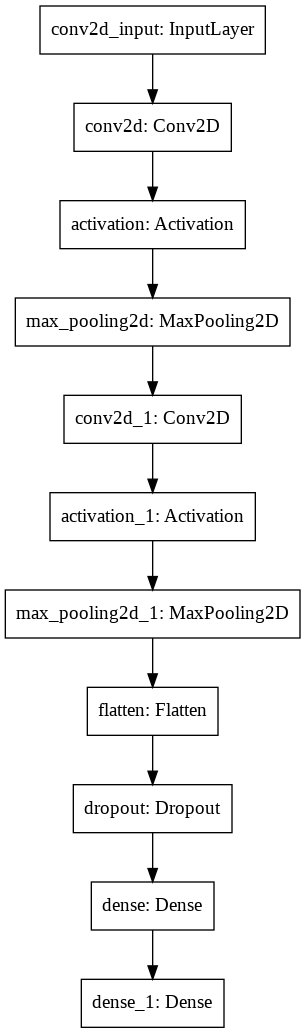

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='Architecture.png')

In [15]:
from tensorflow.keras.optimizers import Adam

epochs = 50

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
fitted_model = model.fit(x_train, y_train, epochs=epochs, validation_split=0.25, batch_size=batch_size)

Train on 774 samples, validate on 258 samples
Epoch 1/50
774/774 [==============================] - 30s 38ms/sample - loss: 0.8428 - acc: 0.5452 - val_loss: 0.6871 - val_acc: 0.5349
Epoch 2/50
774/774 [==============================] - 29s 38ms/sample - loss: 0.6751 - acc: 0.5866 - val_loss: 0.6505 - val_acc: 0.5698
Epoch 3/50
774/774 [==============================] - 29s 38ms/sample - loss: 0.6007 - acc: 0.6770 - val_loss: 0.5488 - val_acc: 0.7442
Epoch 4/50
774/774 [==============================] - 30s 39ms/sample - loss: 0.4800 - acc: 0.7933 - val_loss: 0.4952 - val_acc: 0.7248
Epoch 5/50
774/774 [==============================] - 29s 38ms/sample - loss: 0.4204 - acc: 0.8114 - val_loss: 0.3306 - val_acc: 0.8953
Epoch 6/50
774/774 [==============================] - 30s 38ms/sample - loss: 0.3124 - acc: 0.8760 - val_loss: 0.3033 - val_acc: 0.8682
Epoch 7/50
774/774 [==============================] - 30s 38ms/sample - loss: 0.2643 - acc: 0.9018 - val_loss: 0.2713 - val_acc: 0.9186
Ep

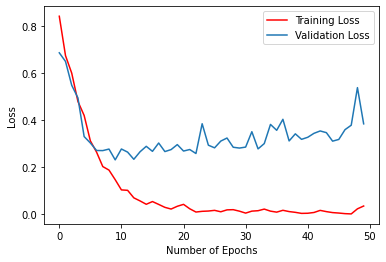

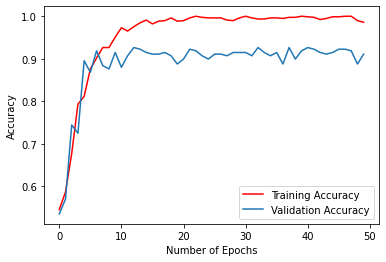

In [17]:
import matplotlib.pyplot as plt

plt.plot(fitted_model.history['loss'], 'r', label='Training Loss')
plt.plot(fitted_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(fitted_model.history['acc'], 'r', label='Training Accuracy')
plt.plot(fitted_model.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model.save('face_mask_detection_model.h5')